In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',200)

In [2]:
df = pd.read_csv('listings_new.csv')

In [3]:
df.head()

,Unnamed: 0,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,0,3,95.0,0.0,47.0,47.0,5.0,1.0,1.0,1.0,1,0,6.0,2,2,4,4,18.0,130.0,150.000000,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,0.0,0,0.0,0.0,31.0,31.0,0.0,0.0,0.02,4.867534
1,1,3,95.0,0.0,47.0,47.0,5.0,1.0,1.0,1.0,1,0,8.0,4,3,6,4,22.0,60.0,150.000000,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,1.0,3,0.0,0.0,31.0,31.0,0.0,0.0,0.21,4.094345
2,2,2,100.0,0.0,2.0,2.0,6.0,1.0,1.0,1.0,1,2,2.0,2,1,1,4,41.0,33.0,100.000000,89.922336,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.0,10.0,9.0,10.0,10.0,9.0,9.0,0.0,1,0.0,0.0,2.0,0.0,2.0,0.0,3.05,3.496508
3,3,3,100.0,1.0,5.0,5.0,8.0,1.0,1.0,0.0,1,0,6.0,4,3,5,4,46.0,210.0,300.000000,80.000000,3.0,10.0,3.0,1125.0,3.0,5.0,1125.0,1125.0,3.1,1125.0,10.0,33.0,56.0,326.0,49.0,17.0,94.0,10.0,10.0,10.0,10.0,9.0,9.0,1.0,3,0.0,1.0,2.0,2.0,0.0,0.0,0.47,5.347108
4,4,3,100.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1,2,2.0,2,1,1,4,17.0,45.0,991.363756,-10.009156,1.0,25.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,10.0,31.0,41.0,77.0,254.0,48.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3,1.0,1.0,1.0,0.0,1.0,0.0,2.29,3.806662


In [4]:
df.drop('Unnamed: 0',1,inplace = True)

In [5]:
df.drop('host_listings_count',1,inplace = True)

In [6]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# for i in df.select_dtypes('object').columns:
#     df[i] = le.fit_transform(df[i])

In [7]:
rounding_categorical = ['bathrooms','beds','bedrooms']

In [8]:
df[rounding_categorical] = df[rounding_categorical].astype(int)
df[rounding_categorical]

,bathrooms,beds,bedrooms
0,2,4,2
1,4,6,3
2,2,1,1
3,4,5,3
4,2,1,1
...,...,...,...
20355,2,1,1
20356,2,1,1
20357,4,1,1
20358,2,1,1


In [9]:
for i in df.select_dtypes('bool').columns:
    df[i] = df[i].astype(int)

In [10]:
df['log_price'] = np.log(df.price)

In [11]:
daf = df.drop('price',1)

In [12]:
daf.shape

(20360, 51)

In [13]:
X,y = daf.drop('log_price',1), daf.log_price

In [14]:
import statsmodels.api as sm

In [15]:
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     333.7
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:11:08   Log-Likelihood:                -19678.
No. Observations:               20360   AIC:                         3.946e+04
Df Residuals:                   20309   BIC:                         3.986e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            3.1529      0.197     15.998      0.000       2.767       3.539
host_response_time                              -0.0009      0.006     -0.143      0.886      -0.014       0.012
host_response_rate                               0.0006      0.000      1.811      0.070   -4.86e-05       0.001
host_is_superhost                                0.0137      0.012      1.139      0.255      -0.010       0.037
host_total_listings_count                       -0.0013      0.000     -8.875      0.000      -0.002      -0.001
host_verifications                              -0.0225      0.002    -10.394      0.000      -0.027      -0.018
host_has_profile_pic                            -0.0143      0.099     -0.145      0.884      -0.208       0.179
host_identity_verified                           0.0014      0.010      0.142      0.887      -0.018       0.021
is_location_exact                                0.0083      0.010      0.860      0.390      -0.011       0.027
property_type                                    0.0008      0.001      1.102      0.270      -0.001       0.002
room_type                                       -0.0067      0.006     -1.198      0.231      -0.018       0.004
accommodates                                     0.1728      0.003     55.983      0.000       0.167       0.179
bathrooms                                       -0.0023      0.004     -0.548      0.584      -0.011       0.006
bedrooms                                         0.0019      0.008      0.237      0.813      -0.014       0.017
beds                                            -0.0027      0.004     -0.622      0.534      -0.011       0.006
bed_type                                        -0.0272      0.038     -0.711      0.477      -0.102       0.048
amenities                                        0.0024      0.000      5.291      0.000       0.002       0.003
security_deposit                              4.401e-05   1.17e-05      3.762      0.000    2.11e-05    6.69e-05
cleaning_fee                                     0.0012      0.000      8.003      0.000       0.001       0.001
guests_included                                  0.0370      0.004      9.357      0.000       0.029       0.045
extra_people                                     0.0020      0.000      6.316      0.000       0.001       0.003
minimum_nights                                   0.0006      0.001      0.447      0.655      -0.002       0.003
maximum_nights                                   0.0002   4.46e-05      4.881      0.000       0.000       0.000
minimum_minimum_nights                          -0.0076      0.002     -4.994      0.000      -0.011      -0.005
maximum_minimum_nights          

In [17]:
# model.summary2()

In [18]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score


In [19]:
def MLmodel(model,Xtrain,Xtest, ytrain,ytest ):
    model.fit(Xtrain,ytrain)
    pred = model.predict(Xtest)
    train = model.score(Xtrain,ytrain)
    test = model.score(Xtest,ytest)
    
#     scores = cross_val_score(model,X,y,cv = 5)
#     print('cross validation mean score', scores.mean())
    print('train score',train)
    print('test score',test)
    print('MSE', mean_squared_error(ytest,pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,pred)))
    print('MAE', mean_absolute_error(ytest,pred))

In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [28]:
scores = cross_val_score(lr,X,y,cv = 5)
print('cross validation mean score', scores.mean())

cross validation mean score -6529.309504231478


In [29]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [30]:
lr = LinearRegression()

MLmodel(lr,X_train, X_test, y_train,y_test)

train score 0.4521246618699525
test score 0.44329336870346703
MSE 0.4050325376935213
RMSE 0.6364216665808301
MAE 0.43804203283086024


In [31]:
dt = DecisionTreeRegressor(max_depth= 3)

MLmodel(dt,X_train, X_test, y_train,y_test)

train score 0.4399622759186394
test score 0.43102063806804103
MSE 0.41396157671380174
RMSE 0.6433984587437257
MAE 0.43212093593245077


In [32]:
rf = RandomForestRegressor(n_estimators= 5)

MLmodel(rf,X_train,X_test,y_train,y_test)

train score 0.9261118674929337
test score 0.6094883451623523
MSE 0.28411719506452005
RMSE 0.5330264487476396
MAE 0.3520824715436014


In [33]:
knn = KNeighborsRegressor(n_neighbors= 2)

MLmodel(knn,X_train,X_test,y_train,y_test)

train score 0.7875424595186846
test score 0.31886241726982456
MSE 0.4955624167959357
RMSE 0.703961942718451
MAE 0.47644182429660037


In [34]:
nb = GaussianNB()

# MLmodel(nb,X_train,X_test,y_train,y_test)


In [35]:
from sklearn.linear_model import Ridge,Lasso


In [36]:
params = {'alpha': np.linspace(0.001,5,20)}

ri = Ridge()

gs_ridge = GridSearchCV(ri,params,cv = 5)

gs_ridge.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 2.64105263e-01, 5.27210526e-01, 7.90315789e-01,
       1.05342105e+00, 1.31652632e+00, 1.57963158e+00, 1.84273684e+00,
       2.10584211e+00, 2.36894737e+00, 2.63205263e+00, 2.89515789e+00,
       3.15826316e+00, 3.42136842e+00, 3.68447368e+00, 3.94757895e+00,
       4.21068421e+00, 4.47378947e+00, 4.73689474e+00, 5.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [37]:
gs_ridge.best_estimator_

Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [38]:
ridge = Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

MLmodel(ridge,X_train,X_test,y_train,y_test)

train score 0.4521236883611505
test score 0.44333825517493775
MSE 0.40499988049056046
RMSE 0.6363960091724024
MAE 0.43802333115117525


In [39]:
# params = {'alpha': [0.00001,0.0001,0.001,0.01,0.1,0.5]}

# la = Lasso()

# gs_lasso = GridSearchCV(la,params,cv = 5)

# gs_lasso.fit(X,y)

In [40]:
# gs_lasso.best_estimator_

In [41]:
# lasso = 

# MLmodel(lasso,X_train,X_test,y_train,y_test)

In [42]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 53.205983
Best score using built-in LassoCV: 0.000008


In [43]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 48 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

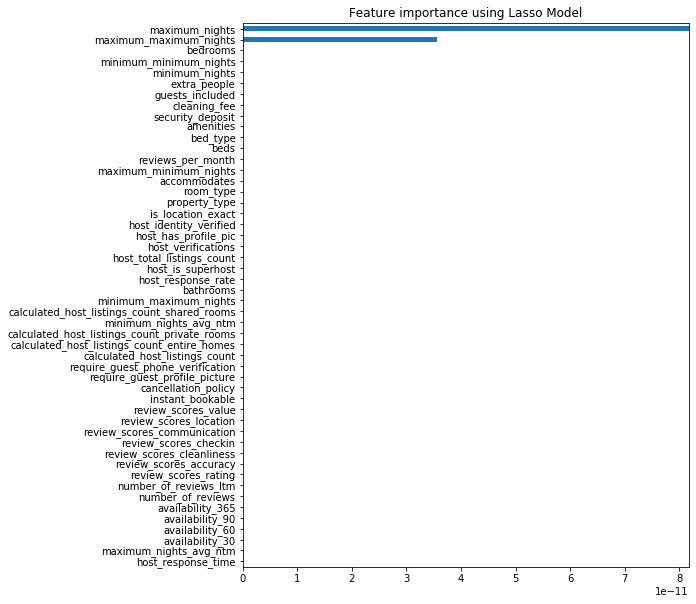

In [44]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [45]:
import xgboost
from sklearn.metrics import explained_variance_score

In [46]:
xgb = xgboost.XGBRegressor(n_estimators=250, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)

In [47]:
xgb.fit(X_train,y_train)

[19:15:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [48]:
predictions = xgb.predict(X_test)
print(explained_variance_score(y_test,predictions))

0.7166998567842668


In [49]:
# MLmodel(xgb,X_train_vif,X_test_vif,y_train_vif,y_test_vif)   # it got less accuracy

In [50]:
MLmodel(xgb,X_train,X_test,y_train,y_test)   # it got less accuracy

[19:15:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train score 0.841473813137161
test score 0.7166935980617501
MSE 0.20611989236526393
RMSE 0.45400428672564747
MAE 0.31297360335207763


In [51]:
# MLmodel(xgb,X_train_vif,X_test_vif,y_train_vif,y_test_vif)   # it got less accuracy

In [52]:
accuracy = explained_variance_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.67%


In [53]:
from sklearn.ensemble import AdaBoostRegressor

In [54]:
ada_clf=AdaBoostRegressor(dt , learning_rate=0.08, loss='linear',
        n_estimators=20, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.08, loss='linear', n_estimators=20,
                  random_

In [55]:
ada_clf.score(X_test, y_test)

0.4364604740098087

In [56]:
ada_clf.score(X_train, y_train)

0.4515040602682516

##### feature selection

###### Assumption 1:

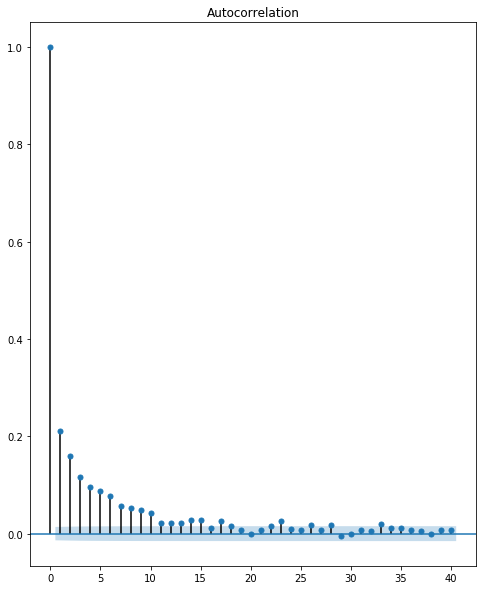

In [57]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()

###### Assumption 2 :

In [58]:
from scipy import stats
print(stats.jarque_bera(model.resid))

(80589.11841038194, 0.0)


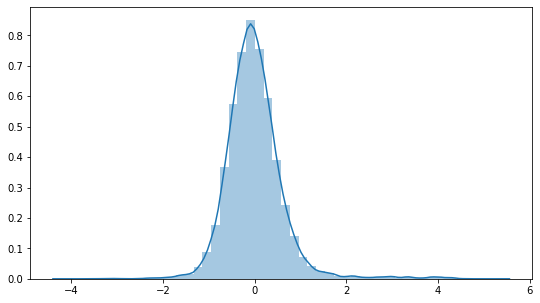

In [59]:
plt.figure(figsize=(9,5))
sns.distplot(model.resid)

###### Assumption 3 Linearity

In [60]:
pred = model.predict()
resid = model.resid

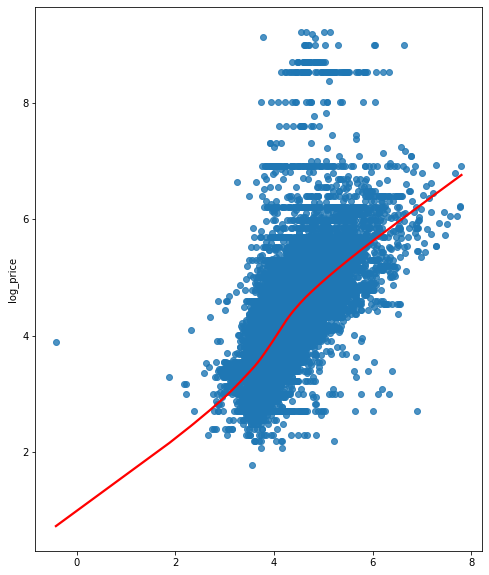

In [61]:
sns.regplot(x=pred ,y=y, lowess=True, line_kws={'color': 'red'})

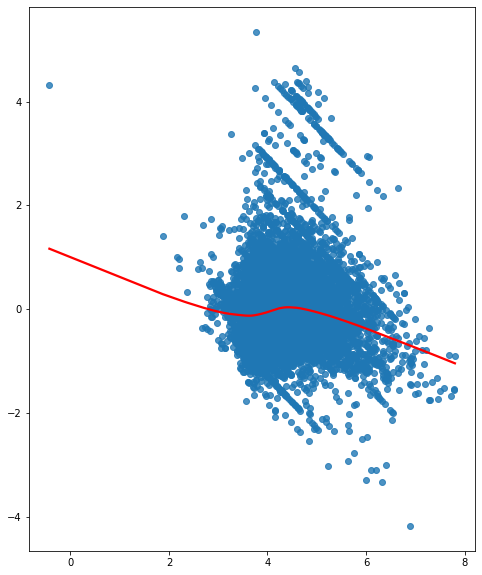

In [62]:
sns.regplot(x=pred ,y= resid, lowess=True, line_kws={'color': 'red'})

In [63]:
sm.stats.diagnostic.linear_rainbow(res=model, frac=0.2)

(1.20547127849925, 9.417821992853466e-14)

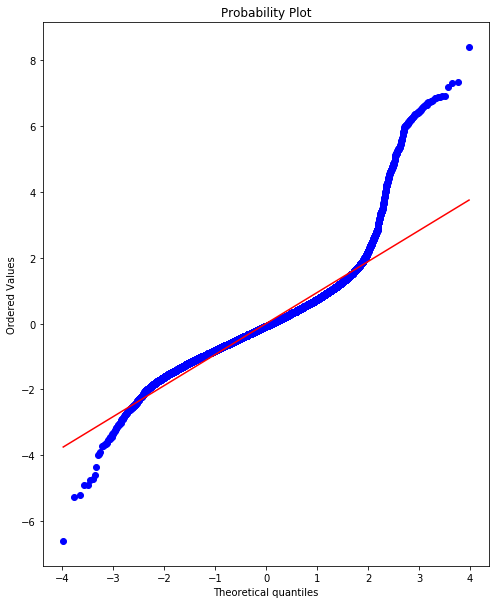

In [64]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = model.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [65]:
model.resid.mean()

-6.175562973026624e-11

###### Assumation 4 homoscadesticity

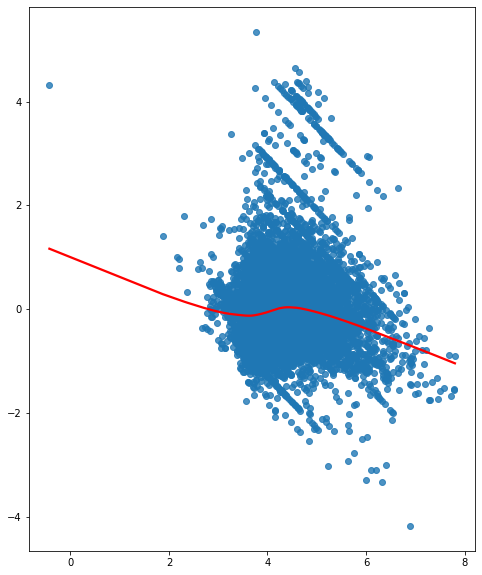

In [66]:
sns.regplot(x=pred ,y= resid, lowess=True, line_kws={'color': 'red'})

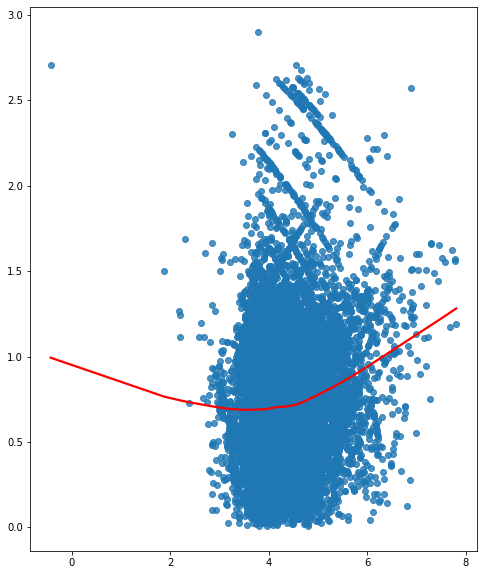

In [67]:
sns.regplot(x=pred, y=np.sqrt(np.abs(st_residual)), lowess=True, line_kws={'color': 'red'})


##### Assumption 5 Multicollinearity

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns)

,vif
host_response_time,1.152031e+00
host_response_rate,1.136365e+00
host_is_superhost,1.063777e+00
host_total_listings_count,3.258669e+00
host_verifications,1.179883e+00
host_has_profile_pic,1.005756e+00
host_identity_verified,1.098330e+00
is_location_exact,1.035670e+00
property_type,1.037561e+00
room_type,1.541766e+00


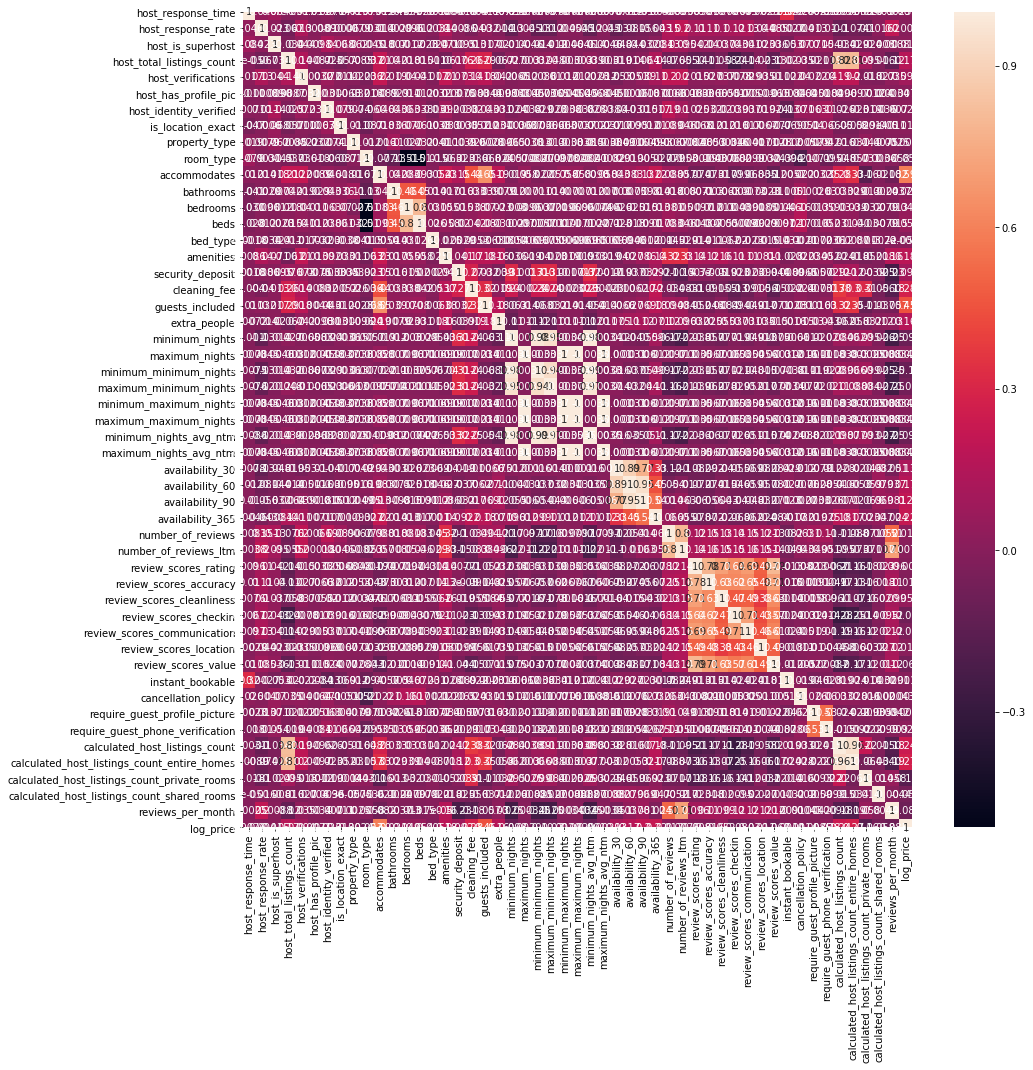

In [69]:
plt.figure(figsize=(15,15))
sns.heatmap(daf.corr(), annot=True)

In [70]:
cor = daf.corr()

In [71]:
#Correlation with output variable
cor_target = abs(cor["log_price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

accommodates    0.591005
log_price       1.000000
Name: log_price, dtype: float64

In [72]:
mini = daf[['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm']]

In [73]:
mini.corr()

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
minimum_nights,1.000000,-0.003416,0.975576,0.947667,-0.003416,-0.003416,0.983494,-0.003416
maximum_nights,-0.003416,1.000000,-0.003315,-0.003676,1.000000,1.000000,-0.003529,1.000000
minimum_minimum_nights,0.975576,-0.003315,1.000000,0.939681,-0.003315,-0.003315,0.985707,-0.003315
maximum_minimum_nights,0.947667,-0.003676,0.939681,1.000000,-0.003676,-0.003676,0.966895,-0.003676
minimum_maximum_nights,-0.003416,1.000000,-0.003315,-0.003676,1.000000,1.000000,-0.003529,1.000000
maximum_maximum_nights,-0.003416,1.000000,-0.003315,-0.003676,1.000000,1.000000,-0.003529,1.000000
minimum_nights_avg_ntm,0.983494,-0.003529,0.985707,0.966895,-0.003529,-0.003529,1.000000,-0.003529
maximum_nights_avg_ntm,-0.003416,1.000000,-0.003315,-0.003676,1.000000,1.000000,-0.003529,1.000000


In [74]:
plt.figure(figsize=(15,15))
sns.heatmap(min.corr(), annot = True)

AttributeError: 'builtin_function_or_method' object has no attribute 'corr'

<Figure size 1080x1080 with 0 Axes>

###### Feature Selection

In [75]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 2
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [76]:
## passing X to the function so that the multicollinearity gets removed.
train_out = calculate_vif(X)

Iteration no.
1
[15.030582314920295, 46.638602645741926, 1.2934314007544394, 3.6688616806003704, 7.8862569069784, 363.6234990328644, 1.6160329377794989, 3.163933857249802, 1.33832678331848, 3.379238668383106, 7.469109143899983, 7.743348583422842, 10.671754143702671, 7.5502020211934875, 465.83283497603395, 5.9232440044388355, 1.564557299402976, 3.4848521860008614, 4.543534397074871, 1.5029281364470286, 38.82339903229445, 45310806313.99937, 48.988300208672115, 21.061620405798926, 47617583566.77782, 142923775483.42603, 110.02257392487532, 147891751851.12622, 12.420597979836398, 69.68979822869635, 47.58983452204953, 4.541420802834535, 4.105500683860373, 6.851781626884967, 392.09833820174, 271.9398777763857, 158.2405759139952, 256.5102737997453, 279.7826743439738, 229.91079705890442, 232.57249956961738, 2.7740231572127434, 3.0190779272129395, 1.4275887345173575, 1.4827114398647157, 132.73426627998637, 117.33406282920953, 10.483435095010579, 1.0511183301347413, 4.707624862115377]
Max VIF is 

Iteration no.
10
[14.90944820911216, 44.529676921321006, 1.29226100972991, 3.6472692202426913, 7.8537275032209575, 124.52625046034916, 1.6144275615556678, 3.153048362967269, 1.3368356327571596, 3.3620361649648545, 7.44017359356469, 7.710848934190558, 10.65018792175923, 7.548254283262657, 5.904707902263781, 1.55789239923298, 3.454919902706758, 4.537207963374031, 1.500460737581135, 38.584605073769644, 48.8036436762062, 21.04867674473017, 1.0066145281749515, 109.56186348843255, 12.387593099717696, 69.63453402412836, 47.51260604896538, 4.5231736747965545, 4.0906536080160585, 6.813146887395156, 124.51544443083591, 126.87631968151359, 2.770760694630028, 3.0126520426737327, 1.4265914298648805, 1.4815900366399612, 125.01985138737669, 110.61919078737574, 9.942134921127002, 1.0459949377814681, 4.68495163891843]
Max VIF is for variable no.:
31
Iteration no.
11
[14.895123533942936, 44.44357112055256, 1.2922563126360664, 3.645840991748912, 7.85359809515145, 111.76577417334379, 1.614328446681977, 3.

Iteration no.
21
[1.2787871834920284, 3.594609861538354, 6.690188498434066, 1.5879419366624647, 2.883703063609244, 1.3185403029650393, 2.5808548237933007, 7.320939857534651, 6.797240096806339, 4.130196491860859, 5.451121858886541, 1.5424247311237451, 3.4267315386432453, 4.487007957428176, 1.4944393505179854, 1.4760407235389235, 1.0063778078895198, 4.770605965874959, 9.490102250593807, 4.371966578545687, 4.064304102200208, 6.738764057137003, 2.2765936573686107, 2.8110119768858923, 1.4257099163186244, 1.4801993327126683, 4.0713019372580055, 1.518928677512541, 1.0230930072061055, 4.3462121978520605]
Max VIF is for variable no.:
18
Iteration no.
22
[1.2785053482035036, 3.593994625788317, 6.664818043495563, 1.5878296030531063, 2.8816684124789598, 1.3184724459587194, 2.580563138519106, 7.304180445784334, 6.793913234399054, 4.130029715550855, 5.424207084325535, 1.541929839064884, 3.425883028002943, 4.484577305292725, 1.4904669798962291, 1.464198451955781, 1.0063777084608418, 2.065581065707893

In [77]:
# removing collinear variables
# function definition

def calculate_vif(x):
    thresh = 5
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        print("Iteration no.")
        print(i)
        print(vif)
        a = np.argmax(vif)
        print("Max VIF is for variable no.:")
        print(a)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

In [78]:
train_out_5 = calculate_vif(X)

Iteration no.
1
[15.030582314920295, 46.638602645741926, 1.2934314007544394, 3.6688616806003704, 7.8862569069784, 363.6234990328644, 1.6160329377794989, 3.163933857249802, 1.33832678331848, 3.379238668383106, 7.469109143899983, 7.743348583422842, 10.671754143702671, 7.5502020211934875, 465.83283497603395, 5.9232440044388355, 1.564557299402976, 3.4848521860008614, 4.543534397074871, 1.5029281364470286, 38.82339903229445, 45310806313.99937, 48.988300208672115, 21.061620405798926, 47617583566.77782, 142923775483.42603, 110.02257392487532, 147891751851.12622, 12.420597979836398, 69.68979822869635, 47.58983452204953, 4.541420802834535, 4.105500683860373, 6.851781626884967, 392.09833820174, 271.9398777763857, 158.2405759139952, 256.5102737997453, 279.7826743439738, 229.91079705890442, 232.57249956961738, 2.7740231572127434, 3.0190779272129395, 1.4275887345173575, 1.4827114398647157, 132.73426627998637, 117.33406282920953, 10.483435095010579, 1.0511183301347413, 4.707624862115377]
Max VIF is 

Iteration no.
10
[14.90944820911216, 44.529676921321006, 1.29226100972991, 3.6472692202426913, 7.8537275032209575, 124.52625046034916, 1.6144275615556678, 3.153048362967269, 1.3368356327571596, 3.3620361649648545, 7.44017359356469, 7.710848934190558, 10.65018792175923, 7.548254283262657, 5.904707902263781, 1.55789239923298, 3.454919902706758, 4.537207963374031, 1.500460737581135, 38.584605073769644, 48.8036436762062, 21.04867674473017, 1.0066145281749515, 109.56186348843255, 12.387593099717696, 69.63453402412836, 47.51260604896538, 4.5231736747965545, 4.0906536080160585, 6.813146887395156, 124.51544443083591, 126.87631968151359, 2.770760694630028, 3.0126520426737327, 1.4265914298648805, 1.4815900366399612, 125.01985138737669, 110.61919078737574, 9.942134921127002, 1.0459949377814681, 4.68495163891843]
Max VIF is for variable no.:
31
Iteration no.
11
[14.895123533942936, 44.44357112055256, 1.2922563126360664, 3.645840991748912, 7.85359809515145, 111.76577417334379, 1.614328446681977, 3.

Iteration no.
21
[1.2787871834920284, 3.594609861538354, 6.690188498434066, 1.5879419366624647, 2.883703063609244, 1.3185403029650393, 2.5808548237933007, 7.320939857534651, 6.797240096806339, 4.130196491860859, 5.451121858886541, 1.5424247311237451, 3.4267315386432453, 4.487007957428176, 1.4944393505179854, 1.4760407235389235, 1.0063778078895198, 4.770605965874959, 9.490102250593807, 4.371966578545687, 4.064304102200208, 6.738764057137003, 2.2765936573686107, 2.8110119768858923, 1.4257099163186244, 1.4801993327126683, 4.0713019372580055, 1.518928677512541, 1.0230930072061055, 4.3462121978520605]
Max VIF is for variable no.:
18
Iteration no.
22
[1.2785053482035036, 3.593994625788317, 6.664818043495563, 1.5878296030531063, 2.8816684124789598, 1.3184724459587194, 2.580563138519106, 7.304180445784334, 6.793913234399054, 4.130029715550855, 5.424207084325535, 1.541929839064884, 3.425883028002943, 4.484577305292725, 1.4904669798962291, 1.464198451955781, 1.0063777084608418, 2.065581065707893

In [79]:
X_train_vif,X_test_vif,y_train_vif,y_test_vif = train_test_split(train_out,y, test_size = 0.3, random_state = 0)

X_train_vif_5,X_test_vif_5,y_train_vif_5,y_test_vif_5 = train_test_split(train_out_5,y, test_size = 0.3, random_state = 0)

In [80]:
MLmodel(lr,X_train_vif,X_test_vif,y_train_vif,y_test_vif)   # it got less accuracy

train score 0.12795939795864064
test score 0.12897004532049583
MSE 0.6337188262501473
RMSE 0.7960645867328525
MAE 0.5881954345951746


In [81]:
MLmodel(lr,X_train_vif,X_test_vif,y_train_vif,y_test_vif)   # it got less accuracy

train score 0.12795939795864064
test score 0.12897004532049583
MSE 0.6337188262501473
RMSE 0.7960645867328525
MAE 0.5881954345951746


In [82]:
MLmodel(dt,X_train_vif,X_test_vif,y_train_vif,y_test_vif)   # it got less accuracy

train score 0.38087573706707767
test score 0.36861365231337406
MSE 0.4593658496091112
RMSE 0.67776533520763
MAE 0.47719112801668606


In [83]:
MLmodel(rf,X_train_vif,X_test_vif,y_train_vif,y_test_vif)   # it got less accuracy

train score 0.902604011318285
test score 0.5175628481281118
MSE 0.3509976941449854
RMSE 0.5924505837156255
MAE 0.4182308829008868


In [84]:
MLmodel(dt,X_train_vif,X_test_vif,y_train_vif,y_test_vif)   # it got less accuracy

train score 0.38087573706707767
test score 0.36861365231337406
MSE 0.4593658496091112
RMSE 0.67776533520763
MAE 0.47719112801668623


In [85]:
from sklearn.svm import SVR

sv = SVR(C = 0.5,kernel = 'rbf')
sv.fit(be_x,be_y)

NameError: name 'be_x' is not defined

In [ ]:
MLmodel(sv,X_train_vif,X_test_vif,y_train_vif,y_test_vif)   # it got less accuracy

##### backward Elimination

In [ ]:
# backward elimination
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

In [ ]:
be_x = daf[selected_features_BE]
be_y = daf['log_price']
print(be_x.shape)

def statmodel(X,y):
    X_constant = sm.add_constant(X)
    model = sm.OLS(y, X_constant).fit()
    return model.summary()

In [ ]:
statmodel(be_x,be_y)

In [ ]:
X_train_be, X_test_be, y_train_be, y_test_be = train_test_split(be_x,be_y, test_size=0.3, random_state= 1)

In [ ]:
MLmodel(lr,X_train_be, X_test_be, y_train_be, y_test_be)   # it got less accuracy

In [ ]:
MLmodel(dt,X_train_be, X_test_be, y_train_be, y_test_be)   # it got less accuracy

In [ ]:
MLmodel(xgb,X_train_be, X_test_be, y_train_be, y_test_be)   # it got less accuracy

In [ ]:
MLmodel(rf,X_train_be, X_test_be, y_train_be, y_test_be)   # it got less accuracy

In [ ]:
MLmodel(ada_clf,X_train_be, X_test_be, y_train_be, y_test_be)   # it got less accuracy

#### RFE

In [ ]:
from sklearn.feature_selection import RFE

model = LinearRegression()

In [ ]:
#no of features
nof_list=np.arange(1,daf.shape[1])            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [ ]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 51)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

In [ ]:
rfex = daf[selected_features_rfe]
rfey = daf['log_price']
statmodel(rfex,rfey)

##### Regularisation

In [ ]:
# higher the alpha value, more restriction on the coefficients; 
# low alpha > more generalization, coefficients are barely
rr = Ridge(alpha=0.01) 
# restricted and in this case linear and ridge regression resembles
rr.fit(rfex,rfey)

In [ ]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(rfex,rfey) 

In [ ]:
train_score=lr.score(rfex,rfey)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(rfex,rfey)
Ridge_train_score100 = rr100.score(rfex,rfey)
Ridge_test_score100 = rr100.score(X_test, y_test)



In [ ]:
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

In [ ]:
lasso = Lasso()
lasso.fit(rfex,rfey)
train_score=lasso.score(rfex,rfey)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

In [ ]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

##### Multicollinearity

In [ ]:
cor = daf.corr()
cor[abs(cor) > 0.5 ]

##### Polynomial regressor

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(X)


In [ ]:
X_train_poly, X_test_Poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, test_size = 0.3, random_state = 0 )

In [ ]:
MLmodel(rf,X_train_poly, X_test_Poly, y_train_poly, y_test_poly )

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X)


In [ ]:
for i in [2,3,4,5]:
    polynomial_features= PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(X)
    print(MLmodel(rf,X_train_poly, X_test_Poly, y_train_poly, y_test_poly ))